# Optimisation of the Rosenbrock function using Simulated Annealing

In [ ]:
#%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
def rosenbrock(x):
    return sum(100*(x[1:]-x[:-1]**2)**2+(1-x[:-1])**2)

## 2D Illustration of the Rosenbrock function

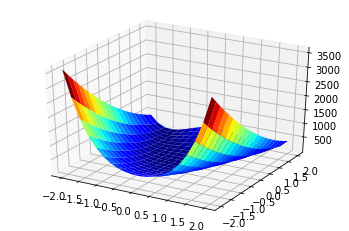

In [3]:
myMin = -2
myMax = 2
xVec = np.linspace(myMin,myMax,20)
yVec = np.linspace(myMin,myMax,20)
xSurf, ySurf = np.meshgrid(xVec,yVec)

zSurf = np.array([[rosenbrock(np.array((xSurf[i,j], ySurf[i,j]))) for j in range(xSurf.shape[1])] for i in range(xSurf.shape[0])])
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xSurf,ySurf,zSurf, cmap=cm.jet)

In [848]:
def simulatedAnnealing(objFun, minMax, xStart, initTemp, finalTemp, coolFactor, searchRadius, maxIterPerTemp):
    # objFun : the function to optimize
    # minMax : 1 to minimize, -1 to maximize
    # xStart: starting point of the search
    # initTemp: initial Temperature
    # finalTemp: finalTemperature
    # coolFactor: parameters <1
    #             At each step temperature change, new temp = current temp * coolFactor
    # searchRadius: the radius of the ball inside which we look for a solution. 
    #               When current temperature < 1, the new search radius = current search radius * coolFactor
    # maxIterTemp: the maximum number of iterations we perform once we found a new optimum at a given temperature
    #              This defines the equilibrium condition at a given temperature, ie we've iterated maxIterPerTemp 
    #              without finding a better solution
    
    # Note on implementation:
    # When the current temperature falls below 1, the search radius gets multiplied by the coolFactor
    # This allows for intensification when we're near the end of the algorithm
    
    # Please note this is a custom implementation of simulated annealing. It was implemented so as to 
    # allow better identification of which parameter to change when convergence isn't obtained.
    # To achieve this, the algorithm "normalizes" delta (the change in energy) using the average delta 
    # at the equilibrium position for a given temperature. This avoids having to adjust for initial temperatures
    # and final temperatures so that the order of magnitude depends on the energy delta. We get a better control
    # of the barrier level for diversification.
    
    curTemp = initTemp
    xBest = np.copy(xStart)
    fxBest = objFun(xBest) * minMax
    
    # to store all evaluated points and associated function values
    xIter = []
    fxIter = []
    
    # to store best x and f(xBest) for a given temperature
    bestxTemp = []
    bestfxTemp = []
        
    iterCount = 0
    while curTemp > finalTemp:
        #restarting from our equilibrium point (ie best value so far)
        x = np.copy(xBest)
        fx = fxBest
        iterCount = 0
        deltaAvg = 0
        
        #we reach equilibrium at this temperature if we iterated maxIterPerTemp times without improving the best solution
        while iterCount < maxIterPerTemp:
            xTest = x + np.random.uniform(-searchRadius, searchRadius, x.shape[0])
            fxTest = objFun(xTest) * minMax
            delta = fxTest - fx
            deltaAvg = (iterCount*deltaAvg+abs(delta))/(iterCount+1)

            if delta < 0 or np.random.random() < np.exp(-(delta/deltaAvg)/curTemp):
                x = np.copy(xTest)
                fx = fxTest
            iterCount+=1
            if fxTest < fxBest:
                #we improved the best solution, reset iterCount to 0 and store new best solution 
                iterCount = 0
                deltaAvg = 0
                xBest = np.copy(xTest)
                fxBest = fxTest

            xIter.append(x)
            fxIter.append(objFun(x))
        bestxTemp.append(xBest)
        bestfxTemp.append(objFun(xBest))
        if curTemp <1:
            # below 1 degree, decrease the search radius to increase intensification
            searchRadius *= coolFactor
        curTemp *= coolFactor

    return bestxTemp, bestfxTemp, xIter, fxIter

## Test of convergence for dimension 2

In [813]:
D = 2
x = np.random.uniform(-20, 20, D)
initTemp = 2
finalTemp = 0.1
coolFactor = 0.9
searchRadius = 0.1
maxIterTemp = 100
minMax = 1  #minimize = 1, maximize = -1

bestxTemp, bestfxTemp, xEvals, fxEvals = simulatedAnnealing(rosenbrock, minMax, x, initTemp, finalTemp, coolFactor, searchRadius, maxIterTemp)

print('starting point: {}'.format(x))
print('solution: {}'.format(bestxTemp[-1]))
print('function value: {}'.format(bestfxTemp[-1]))

starting point: [-17.92464432 -19.82148145]
solution: [1.00036776 1.00077612]
function value: 2.990302300081983e-07


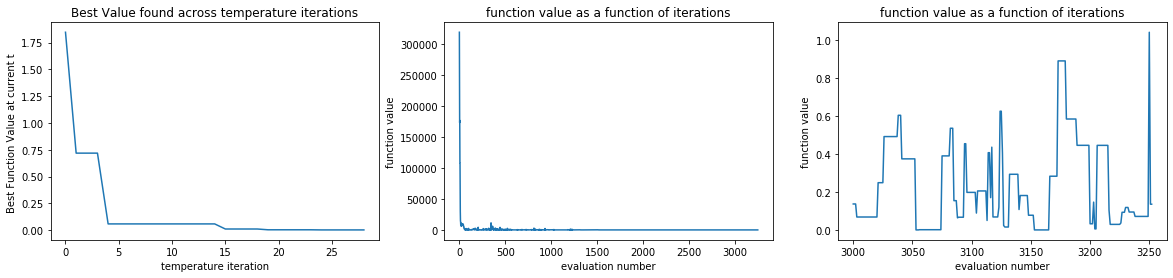

In [812]:
fig = plt.figure()
tempZoom = 0
g1 = fig.add_subplot(1, 3, 1)
plt.plot([i for i in range(tempZoom, len(bestfxTemp))], np.array(bestfxTemp[tempZoom:]))
g1.set_xlabel('temperature iteration')
g1.set_ylabel('Best Function Value at current t ')
g1.title.set_text('Best Value found across temperature iterations')

g2 = fig.add_subplot(1, 3, 2)
plt.plot([i for i in range(len(xEvals))], np.array(fxEvals))
g2.set_xlabel('evaluation number')
g2.set_ylabel('function value')
g2.title.set_text('function value as a function of iterations')

startPos = 3000
g3 = fig.add_subplot(1, 3, 3)
plt.plot([i for i in range(startPos, len(xEvals))], np.array(fxEvals[startPos:]))
g3.set_xlabel('evaluation number')
g3.set_ylabel('function value')
g3.title.set_text('function value as a function of iterations')

fig.set_figwidth(20)

In [815]:
#define convergence as f(x)<1e-4

initTemp = 2
finalTemp = 0.1
coolFactor = 0.9
searchRadius = 0.1
maxIterTemp = 100
minMax = 1  #minimize = 1, maximize = -1

uppBound = 1e-4
convCount = 0
numSimul = 100
np.random.seed(1234)
for i in range(numSimul):
    bestxTemp, bestfxTemp, xEvals, fxEvals = simulatedAnnealing(rosenbrock, minMax, x, initTemp, finalTemp, coolFactor, searchRadius, maxIterTemp)
    if bestfxTemp[-1] < uppBound:
        convCount+=1
print('convergence frequency: {}'.format(convCount/numSimul))

convergence frequency: 1.0


## Test in dimension 5

In [819]:
D = 5
x = np.random.uniform(-20, 20, D)
initTemp = 2
finalTemp = 0.1
coolFactor = 0.9
searchRadius = 0.1
maxIterTemp = 100
minMax = 1  #minimize = 1, maximize = -1

bestxTemp, bestfxTemp, xEvals, fxEvals = simulatedAnnealing(rosenbrock, minMax, x, initTemp, finalTemp, coolFactor, searchRadius, maxIterTemp)

print('starting point: {}'.format(x))
print('solution: {}'.format(bestxTemp[-1]))
print('function value: {}'.format(bestfxTemp[-1]))

starting point: [  1.80961417 -18.40062079 -13.04723708 -10.57323778  -0.56301145]
solution: [0.98145569 0.96316904 0.92596982 0.85372117 0.72860782]
function value: 0.03025020593792358


### Starting with the same parameters as in dimension 2, results are not bad but how can we improve convergence?

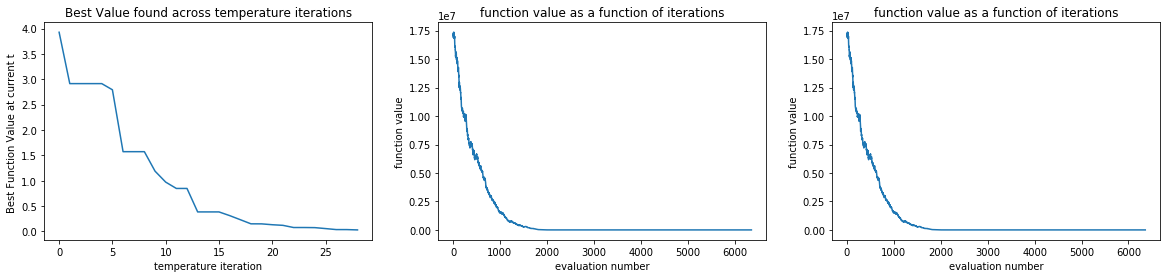

In [820]:
fig = plt.figure()
tempZoom = 0
g1 = fig.add_subplot(1, 3, 1)
plt.plot([i for i in range(tempZoom, len(bestfxTemp))], np.array(bestfxTemp[tempZoom:]))
g1.set_xlabel('temperature iteration')
g1.set_ylabel('Best Function Value at current t ')
g1.title.set_text('Best Value found across temperature iterations')

g2 = fig.add_subplot(1, 3, 2)
plt.plot([i for i in range(len(xEvals))], np.array(fxEvals))
g2.set_xlabel('evaluation number')
g2.set_ylabel('function value')
g2.title.set_text('function value as a function of iterations')

iterZoom = 0
g3 = fig.add_subplot(1, 3, 3)
plt.plot([i for i in range(iterZoom, len(xEvals))], np.array(fxEvals[iterZoom:]))
g3.set_xlabel('evaluation number')
g3.set_ylabel('function value')
g3.title.set_text('function value as a function of iterations')

fig.set_figwidth(20)

### The above graphs show convergence but the difference in order of magnitude makes the graph impossible to use to understand what happens towards the end of the algorithm.
### You can zoom on temperature iteration using the tempZoom variable below and zoom on iteration number using iterZoom variable.

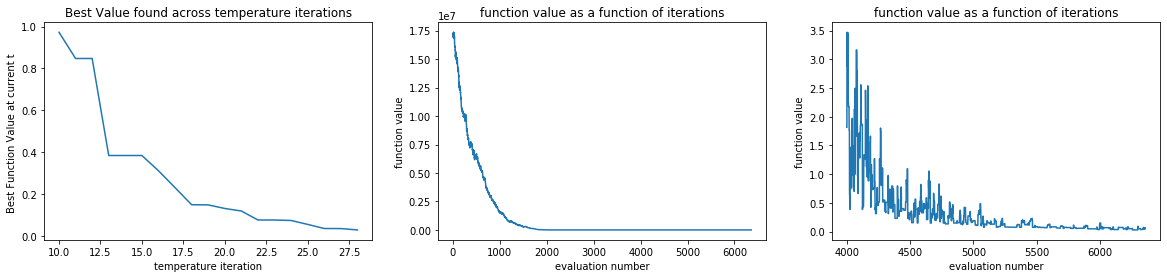

In [822]:
fig = plt.figure()
tempZoom = 10
g1 = fig.add_subplot(1, 3, 1)
plt.plot([i for i in range(tempZoom, len(bestfxTemp))], np.array(bestfxTemp[tempZoom:]))
g1.set_xlabel('temperature iteration')
g1.set_ylabel('Best Function Value at current t ')
g1.title.set_text('Best Value found across temperature iterations')

g2 = fig.add_subplot(1, 3, 2)
plt.plot([i for i in range(len(xEvals))], np.array(fxEvals))
g2.set_xlabel('evaluation number')
g2.set_ylabel('function value')
g2.title.set_text('function value as a function of iterations')

iterZoom = 4000
g3 = fig.add_subplot(1, 3, 3)
plt.plot([i for i in range(iterZoom, len(xEvals))], np.array(fxEvals[iterZoom:]))
g3.set_xlabel('evaluation number')
g3.set_ylabel('function value')
g3.title.set_text('function value as a function of iterations')

fig.set_figwidth(20)

### Conclusion
### It doesn't look like we're stuck in a local minimum. 
### We are converging towards the right solution (x = [1,1,...,1] with f(x) = 0) but we're missing a few iterations towards the end. It could also be that the search radius is too large near the end. Decreasing the finalTemp to a lower value will allow additional iterations AND a smaller search radius. 

### Also, convergence is very quick at the beginning, we could start from a lower temperature and with a smaller search radius without losing too much on diversification at the beginning

In [827]:
initTemp = 2
finalTemp = 0.005  #from 0.1
coolFactor = 0.9
searchRadius = 0.01 #from 0.1
maxIterTemp = 100
minMax = 1  #minimize = 1, maximize = -1

bestxTemp, bestfxTemp, xEvals, fxEvals = simulatedAnnealing(rosenbrock, minMax, x, initTemp, finalTemp, coolFactor, searchRadius, maxIterTemp)

print('starting point: {}'.format(x))
print('solution: {}'.format(bestxTemp[-1]))
print('function value: {}'.format(bestfxTemp[-1]))

starting point: [  1.80961417 -18.40062079 -13.04723708 -10.57323778  -0.56301145]
solution: [0.99896177 0.99793044 0.99583815 0.99162091 0.98327103]
function value: 9.366429661770707e-05


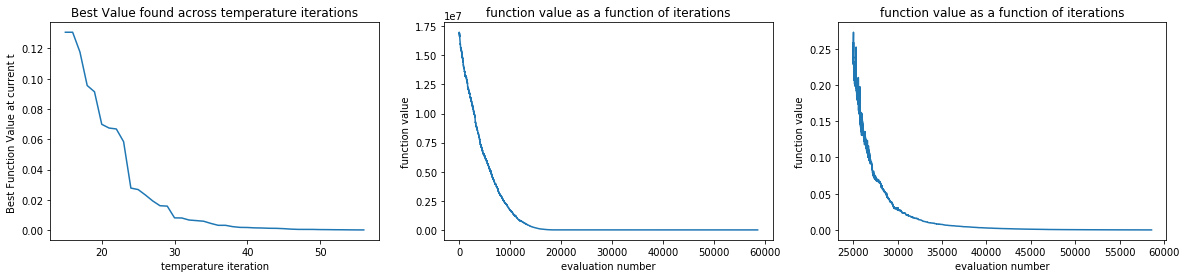

In [831]:
fig = plt.figure()
tempZoom = 15
g1 = fig.add_subplot(1, 3, 1)
plt.plot([i for i in range(tempZoom, len(bestfxTemp))], np.array(bestfxTemp[tempZoom:]))
g1.set_xlabel('temperature iteration')
g1.set_ylabel('Best Function Value at current t ')
g1.title.set_text('Best Value found across temperature iterations')

g2 = fig.add_subplot(1, 3, 2)
plt.plot([i for i in range(len(xEvals))], np.array(fxEvals))
g2.set_xlabel('evaluation number')
g2.set_ylabel('function value')
g2.title.set_text('function value as a function of iterations')

iterZoom = 25000
g3 = fig.add_subplot(1, 3, 3)
plt.plot([i for i in range(iterZoom, len(xEvals))], np.array(fxEvals[iterZoom:]))
g3.set_xlabel('evaluation number')
g3.set_ylabel('function value')
g3.title.set_text('function value as a function of iterations')

fig.set_figwidth(20)

## Test in dimension 10

In [832]:
D = 10
x = np.random.uniform(-10, 10, D)
initTemp = 2
finalTemp = 0.1
coolFactor = 0.9
searchRadius = 0.1
maxIterTemp = 100
minMax = 1  #minimize = 1, maximize = -1

bestxTemp, bestfxTemp, xEvals, fxEvals = simulatedAnnealing(rosenbrock, minMax, x, initTemp, finalTemp, coolFactor, searchRadius, maxIterTemp)

print('starting point: {}'.format(x))
print('solution: {}'.format(bestxTemp[-1]))
print('function value: {}'.format(bestfxTemp[-1]))

starting point: [ 1.15767841  2.26825059 -6.99393815 -4.34633565  2.9534034   0.82106576
  8.72363395  1.93330911 -8.99980097  6.07762549]
solution: [9.80943069e-01 9.64316693e-01 9.24042483e-01 8.51872850e-01
 7.21438400e-01 5.23350160e-01 2.84145329e-01 9.38030072e-02
 2.49251110e-02 9.45699153e-04]
function value: 2.6790329218212756


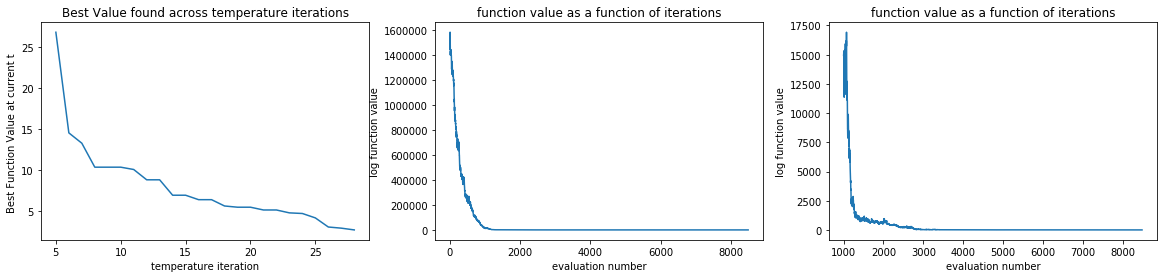

In [836]:
fig = plt.figure()
tempZoom = 5
g1 = fig.add_subplot(1, 3, 1)
plt.plot([i for i in range(tempZoom, len(bestfxTemp))], np.array(bestfxTemp[tempZoom:]))
g1.set_xlabel('temperature iteration')
g1.set_ylabel('Best Function Value at current t ')
g1.title.set_text('Best Value found across temperature iterations')

g2 = fig.add_subplot(1, 3, 2)
plt.plot([i for i in range(len(xEvals))], np.array(fxEvals))
g2.set_xlabel('evaluation number')
g2.set_ylabel('log function value')
g2.title.set_text('function value as a function of iterations')

startPos = 1000
g3 = fig.add_subplot(1, 3, 3)
plt.plot([i for i in range(startPos, len(xEvals))], np.array(fxEvals[startPos:]))
g3.set_xlabel('evaluation number')
g3.set_ylabel('log function value')
g3.title.set_text('function value as a function of iterations')

fig.set_figwidth(20)

In [846]:
initTemp = 2
finalTemp = 0.001 #from 0.1
coolFactor = 0.9
searchRadius = 0.01 #from 0.1
maxIterTemp = 100
minMax = 1  #minimize = 1, maximize = -1

bestxTemp, bestfxTemp, xEvals, fxEvals = simulatedAnnealing(rosenbrock, minMax, x, initTemp, finalTemp, coolFactor, searchRadius, maxIterTemp)

print('starting point: {}'.format(x))
print('solution: {}'.format(bestxTemp[-1]))
print('function value: {}'.format(bestfxTemp[-1]))

starting point: [ 1.15767841  2.26825059 -6.99393815 -4.34633565  2.9534034   0.82106576
  8.72363395  1.93330911 -8.99980097  6.07762549]
solution: [0.99997493 0.99994727 0.999896   0.99978634 0.9995644  0.9991198
 0.99823551 0.99647721 0.99293513 0.98589083]
function value: 6.666962612650792e-05


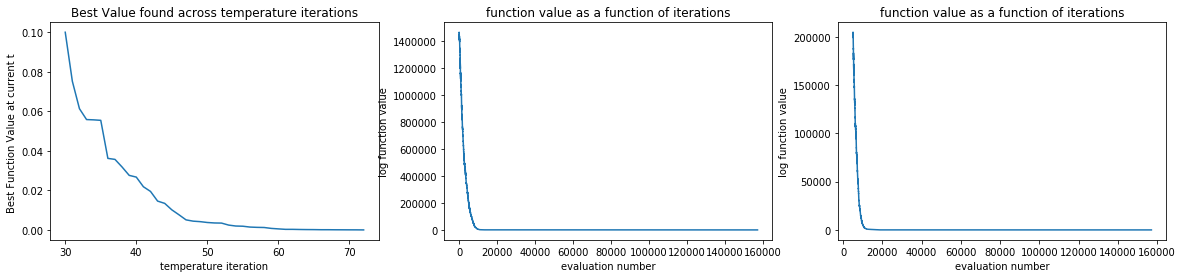

In [847]:
fig = plt.figure()
tempZoom = 30
g1 = fig.add_subplot(1, 3, 1)
plt.plot([i for i in range(tempZoom, len(bestfxTemp))], np.array(bestfxTemp[tempZoom:]))
g1.set_xlabel('temperature iteration')
g1.set_ylabel('Best Function Value at current t ')
g1.title.set_text('Best Value found across temperature iterations')

g2 = fig.add_subplot(1, 3, 2)
plt.plot([i for i in range(len(xEvals))], np.array(fxEvals))
g2.set_xlabel('evaluation number')
g2.set_ylabel('log function value')
g2.title.set_text('function value as a function of iterations')

startPos = 5000
g3 = fig.add_subplot(1, 3, 3)
plt.plot([i for i in range(startPos, len(xEvals))], np.array(fxEvals[startPos:]))
g3.set_xlabel('evaluation number')
g3.set_ylabel('log function value')
g3.title.set_text('function value as a function of iterations')

fig.set_figwidth(20)

### Adjusting parameters to allow convergence: 
### If stuck on a local minimum
### This is a diversification issue, either increase the initial temperature or the seach radius or both. Note that increasing the search radius will have an impact on the search area in the algorithm once temperature decreases below 1, so the algorithm may not have time to converge towards the end.
### Algorithm stops before full convergence
### It could be because we're missing some iterations at low temperature, in which case decreasing the final temperature will allow additional evaluations, OR the search radius is too large at the end (missing specialisation), so that we should decrease the initial search radius.